 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [2]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns


%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [3]:
# Reading whale returns
whale_df = pd.read_csv(Path('whale_returns.csv'), index_col='Date', infer_datetime_format=True, parse_dates=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
# Count nulls
whale_df.isna().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
whale_df = whale_df.dropna()
whale_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [6]:
# Reading algorithmic returns
algo_df = pd.read_csv(Path('algo_returns.csv'), index_col='Date', infer_datetime_format=True, parse_dates=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [7]:
# Count nulls
algo_df.isna().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
algo_df = algo_df.dropna()
algo_df

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [9]:
# Reading S&P 500 Closing Prices
snp500_df = pd.read_csv(Path('sp500_history.csv'), index_col='Date', infer_datetime_format=True, parse_dates=True)
snp500_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [10]:
# Check Data Types
snp500_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1649 entries, 2019-04-23 to 2012-10-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Close   1649 non-null   object
dtypes: object(1)
memory usage: 25.8+ KB


In [11]:
# Fix Data Types
snp500_df['Close'] = snp500_df['Close'].str.replace('$', '')
snp500_df = snp500_df.astype({'Close': float})
snp500_df.head()

<ipython-input-11-4ad78897c52b>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  snp500_df['Close'] = snp500_df['Close'].str.replace('$', '')


,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [12]:
# Calculate Daily Returns
dailyreturnssnp500_df = snp500_df.pct_change()
dailyreturnssnp500_df

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [13]:
# Drop nulls
dailyreturnssnp500_df.dropna()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [14]:
# Rename `Close` Column to be specific to this portfolio.
dailyreturnssnp500_df = dailyreturnssnp500_df.rename(columns={'Close':'S&P Returns'})
dailyreturnssnp500_df


,S&P Returns
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


## Combine Whale, Algorithmic, and S&P 500 Returns

In [15]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([dailyreturnssnp500_df, algo_df,whale_df], axis="columns", join="inner")
combined_df.head()

,S&P Returns,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2019-04-23,NaN,0.004969,0.009622,0.007167,0.003485,0.006472,0.013278
2019-04-22,-0.008764,0.000677,-0.001936,-0.002586,-0.007333,-0.003640,-0.001088
2019-04-18,-0.001011,-0.000588,-0.001229,0.001448,0.001222,0.000582,0.001916
2019-04-17,-0.001577,-0.010301,-0.005228,-0.002897,-0.006467,-0.004409,0.003222
2019-04-16,0.002279,-0.006945,0.002899,0.002699,0.000388,-0.000831,0.000837


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

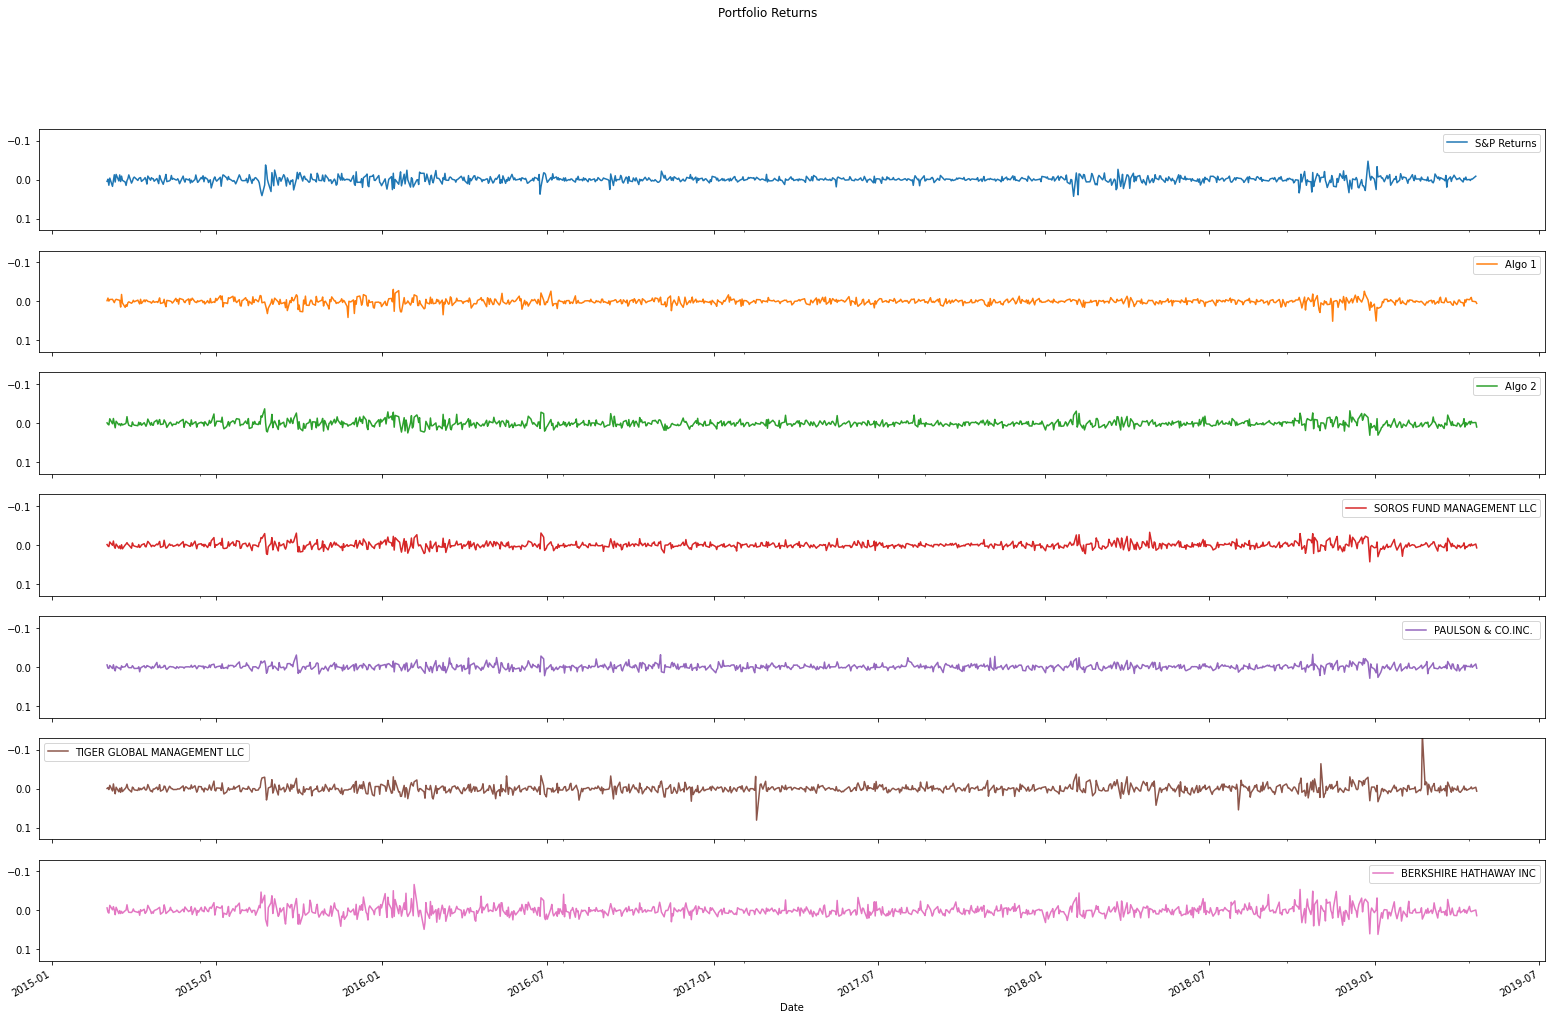

In [16]:
# Plot daily returns of all portfolios
combined_df.plot(kind = 'line', figsize = (27, 17), subplots = True, ylim = (.13,-.13), title = 'Portfolio Returns')

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns Comparison'}, xlabel='Date'>

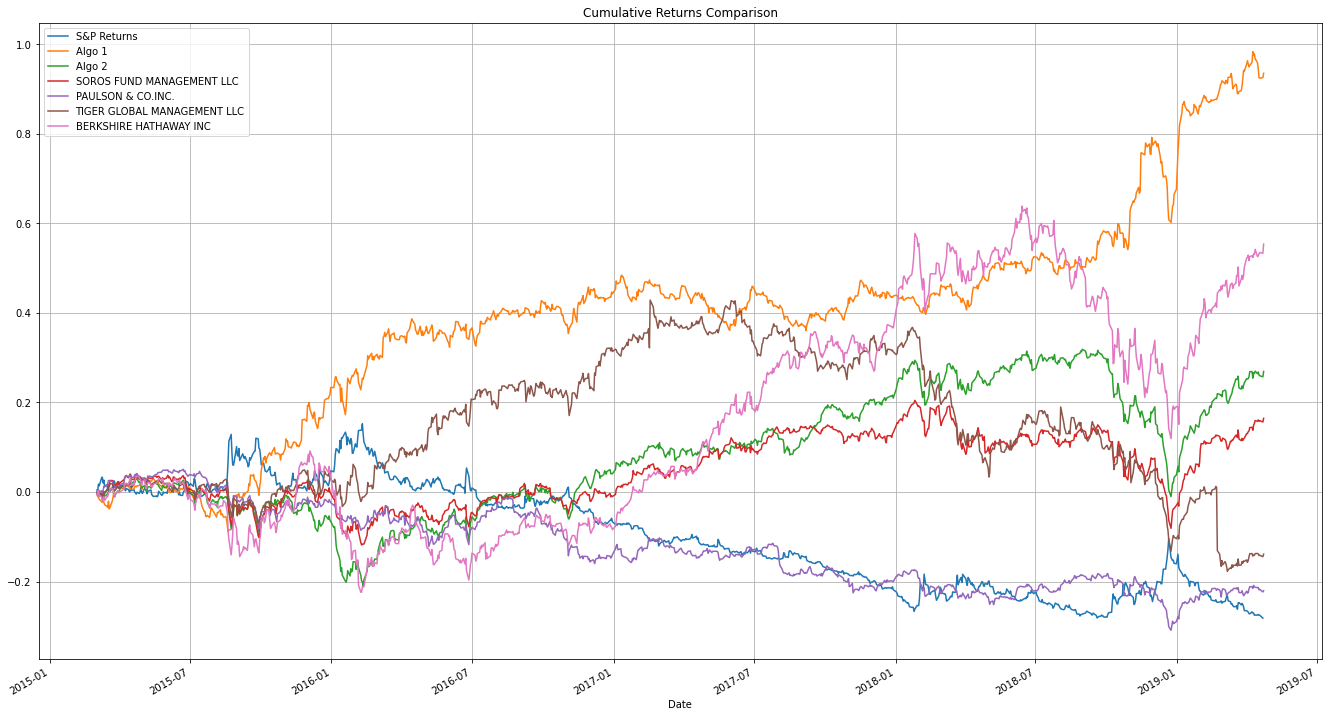

In [17]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_df.loc[::-1]).cumprod() - 1
cumulative_returns
# Plot cumulative returns
cumulative_returns.plot(figsize = (23,13), title = "Cumulative Returns Comparison", grid = True)

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

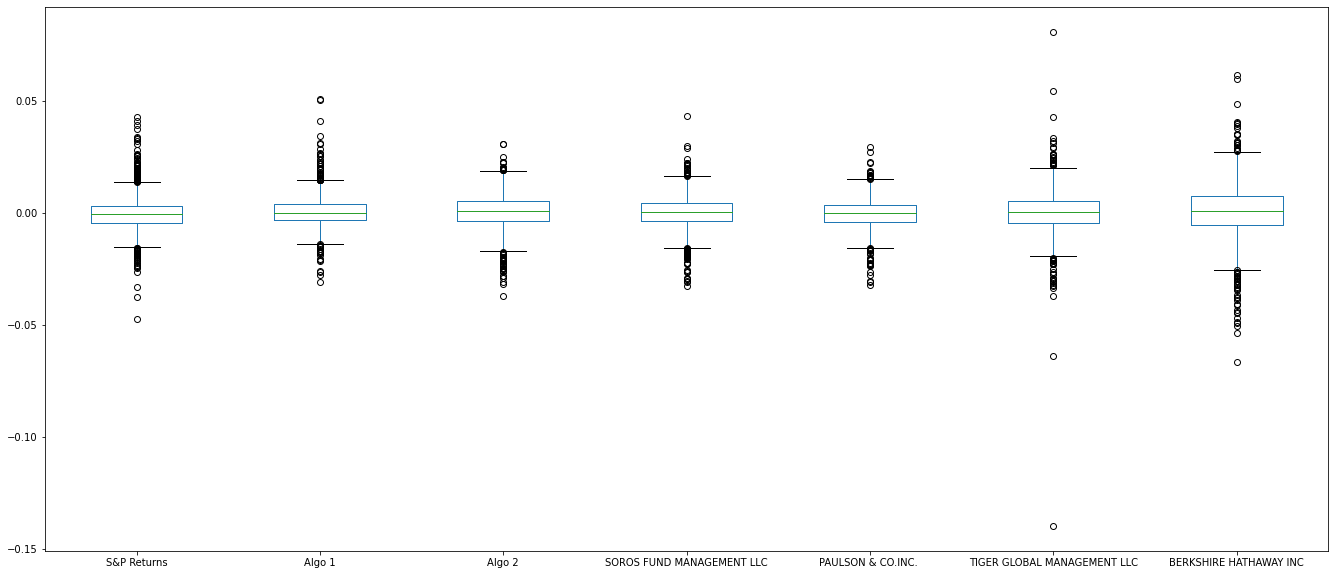

In [18]:
# Box plot to visually show risk
combined_df.plot(kind = 'box', figsize = (23, 10))

### Calculate Standard Deviations

In [19]:
# Calculate the daily standard deviations of all portfolios
combined_std = combined_df.std()
combined_std

S&P Returns                    0.008587
Algo 1                         0.007620
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [20]:
# Calculate  the daily standard deviation of S&P 500
SDdailyreturnssnp500_df = dailyreturnssnp500_df.std()
SDdailyreturnssnp500_df
# Determine which portfolios are riskier than the S&P 500
BERKSHIRE HATHAWAY INC, TIGER GLOBAL MANAGEMENT LLC are risker than the S&P. 

SyntaxError: invalid syntax (<ipython-input-20-d9e9aa5fafee>, line 5)

### Calculate the Annualized Standard Deviation

In [21]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = combined_std * np.sqrt(252)
annualized_std.head()

S&P Returns                  0.136313
Algo 1                       0.120967
Algo 2                       0.132430
SOROS FUND MANAGEMENT LLC    0.125335
PAULSON & CO.INC.            0.111488
dtype: float64

---


## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

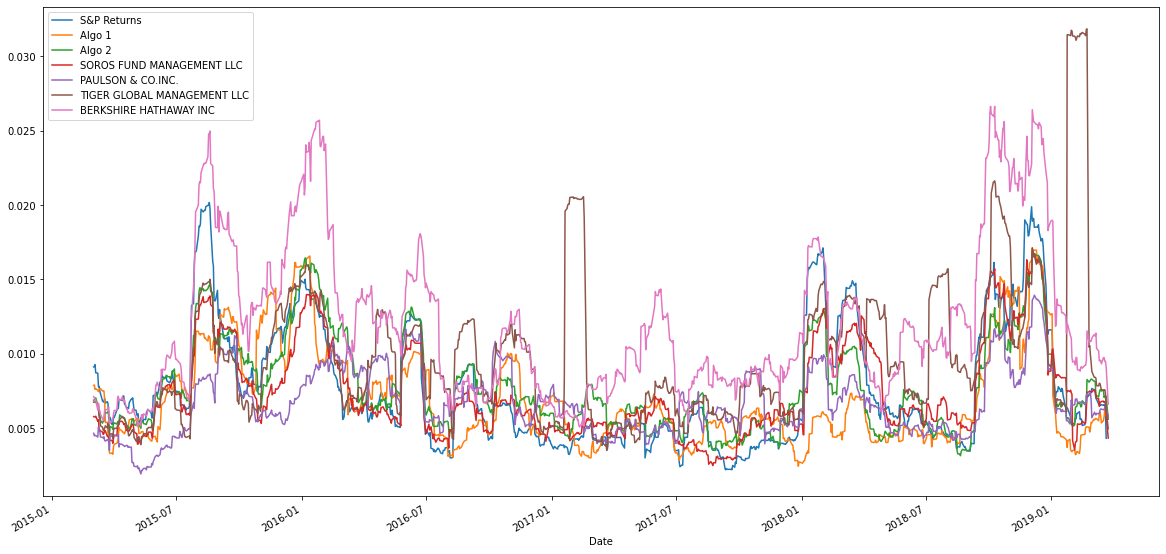

In [22]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window # Plot the rolling standard deviation
Rollingcombined_std = combined_df.rolling(window=21).std().plot(figsize = (20,10))



### Calculate and plot the correlation

<AxesSubplot:>

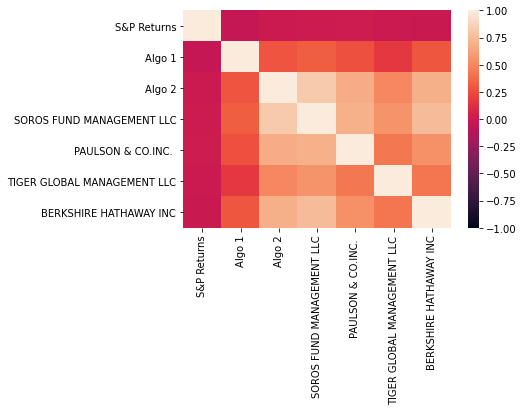

In [23]:
# Calculate the correlation
correlation = combined_df.corr()
# Display de correlation matrix
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':' Algo 1 Beta'}, xlabel='Date'>

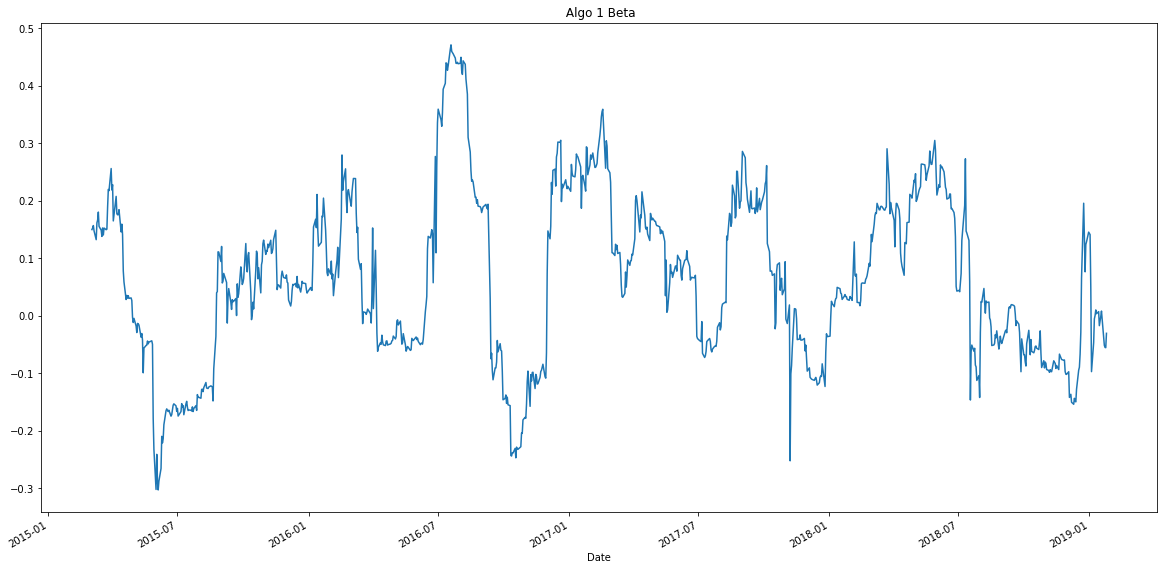

In [24]:
# Calculate covariance of a single portfolio
Algo1covariance = combined_df['Algo 2'].rolling(window=60) .cov(combined_df['S&P Returns'])
# Calculate variance of S&P 500
SNPvariance = combined_df['S&P Returns'].rolling(window=60).var()
# Computing beta
Algo1beta = Algo1covariance/SNPvariance
# Plot beta trend
Algo1beta.plot(figsize=(20, 10), title=' Algo 1 Beta')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [25]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [44]:
# Annualized Sharpe Ratios
rf_rate = .10
sharpe_ratios = ((combined_df.mean()-(combined_df*0.0).mean()) * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios

S&P Returns                   -0.518582
Algo 1                         1.378648
Algo 2                         0.501364
SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

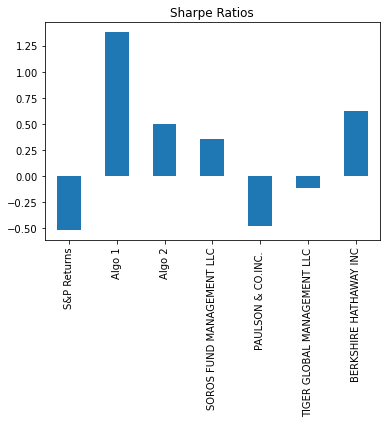

In [45]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

In [ ]:
Algo1/2 & BHI

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [28]:
# Reading data from 1st stock
goog_df = pd.read_csv(Path('goog_historical.csv'), index_col='Trade DATE', infer_datetime_format=True, parse_dates=True)
goog_df = goog_df.rename(columns={'Symbol':'Goog', 'NOCP':'Google CP'})
goog_df.head()

,Goog,Google CP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [29]:
# Reading data from 2nd stock
aapl_df = pd.read_csv(Path('aapl_historical.csv'), index_col='Trade DATE', infer_datetime_format=True, parse_dates=True)
aapl_df = aapl_df.rename(columns={'Symbol':'AAPL', 'NOCP':'APPLE CP'})
aapl_df.head()

,AAPL,APPLE CP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75


In [30]:
# Reading data from 3rd stock
cost_df = pd.read_csv(Path('cost_historical.csv'), index_col='Trade DATE', infer_datetime_format=True, parse_dates=True)
cost_df = cost_df.rename(columns={'Symbol':'COST', 'NOCP':'Costco CP'})
cost_df.head()

,COST,Costco CP
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62


In [31]:
# Combine all stocks in a single DataFrame
My_combined_df = pd.concat([aapl_df, goog_df, cost_df], axis="columns", join="outer")
My_combined_df = My_combined_df.dropna()
My_combined_df.head()

,AAPL,APPLE CP,Goog,Google CP,COST,Costco CP
Trade DATE,,,,,,
2019-05-09,AAPL,200.72,GOOG,1162.38,COST,243.47
2019-05-08,AAPL,202.90,GOOG,1166.27,COST,241.34
2019-05-07,AAPL,202.86,GOOG,1174.10,COST,240.18
2019-05-06,AAPL,208.48,GOOG,1189.39,COST,244.23
2019-05-03,AAPL,211.75,GOOG,1185.40,COST,244.62


In [32]:
# Reset Date index


In [33]:
# Reorganize portfolio data by having a column per symbol
My_combined_df = My_combined_df.drop(columns = ["AAPL","Goog","COST"])
My_combined_df

,APPLE CP,Google CP,Costco CP
Trade DATE,,,
2019-05-09,200.72,1162.38,243.47
2019-05-08,202.90,1166.27,241.34
2019-05-07,202.86,1174.10,240.18
2019-05-06,208.48,1189.39,244.23
2019-05-03,211.75,1185.40,244.62
...,...,...,...
2018-05-17,186.99,1078.59,199.60
2018-05-16,188.18,1081.77,198.71
2018-05-15,186.44,1079.23,195.48


In [34]:
# Calculate daily returns
My_combined_df_dr = My_combined_df.pct_change()
# Drop NAs
My_combined_df_dr = My_combined_df_dr.dropna()
# Display sample data
My_combined_df_dr


,APPLE CP,Google CP,Costco CP
Trade DATE,,,
2019-05-08,0.010861,0.003347,-0.008749
2019-05-07,-0.000197,0.006714,-0.004806
2019-05-06,0.027704,0.013023,0.016862
2019-05-03,0.015685,-0.003355,0.001597
2019-05-02,-0.012279,-0.019226,-0.007890
...,...,...,...
2018-05-17,0.003650,0.011469,0.003217
2018-05-16,0.006364,0.002948,-0.004459
2018-05-15,-0.009246,-0.002348,-0.016255


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [35]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
My_returns = My_combined_df_dr.dot(weights)
# Display sample data
My_returns

Trade DATE
2019-05-08    0.001820
2019-05-07    0.000570
2019-05-06    0.019196
2019-05-03    0.004642
2019-05-02   -0.013131
                ...   
2018-05-17    0.006112
2018-05-16    0.001618
2018-05-15   -0.009283
2018-05-14    0.010216
2018-05-11   -0.000012
Length: 249, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [36]:
# Join your returns DataFrame to the original returns DataFrame
# Only compare dates where return data exists for all the stocks (drop NaNs)
My_combined_df = pd.concat([My_returns, combined_df], axis="columns", join="inner")
My_combined_df = My_combined_df.rename(columns={0:'Custom Portfolio'})
My_combined_df = My_combined_df.dropna()
My_combined_df.head()

,Custom Portfolio,S&P Returns,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
2019-04-22,-0.011812,-0.008764,0.000677,-0.001936,-0.002586,-0.007333,-0.003640,-0.001088
2019-04-18,-0.001148,-0.001011,-0.000588,-0.001229,0.001448,0.001222,0.000582,0.001916
2019-04-17,-0.001541,-0.001577,-0.010301,-0.005228,-0.002897,-0.006467,-0.004409,0.003222
2019-04-16,-0.009149,0.002279,-0.006945,0.002899,0.002699,0.000388,-0.000831,0.000837
2019-04-15,-0.000326,-0.000509,-0.004331,-0.004572,-0.001422,-0.001156,0.000398,-0.010492


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [37]:
# Calculate the annualized `std`
comb_std = My_combined_df.std()
comb_std

Custom Portfolio               0.013426
S&P Returns                    0.009584
Algo 1                         0.008419
Algo 2                         0.008769
SOROS FUND MANAGEMENT LLC      0.009234
PAULSON & CO.INC.              0.007350
TIGER GLOBAL MANAGEMENT LLC    0.014642
BERKSHIRE HATHAWAY INC         0.015548
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:>

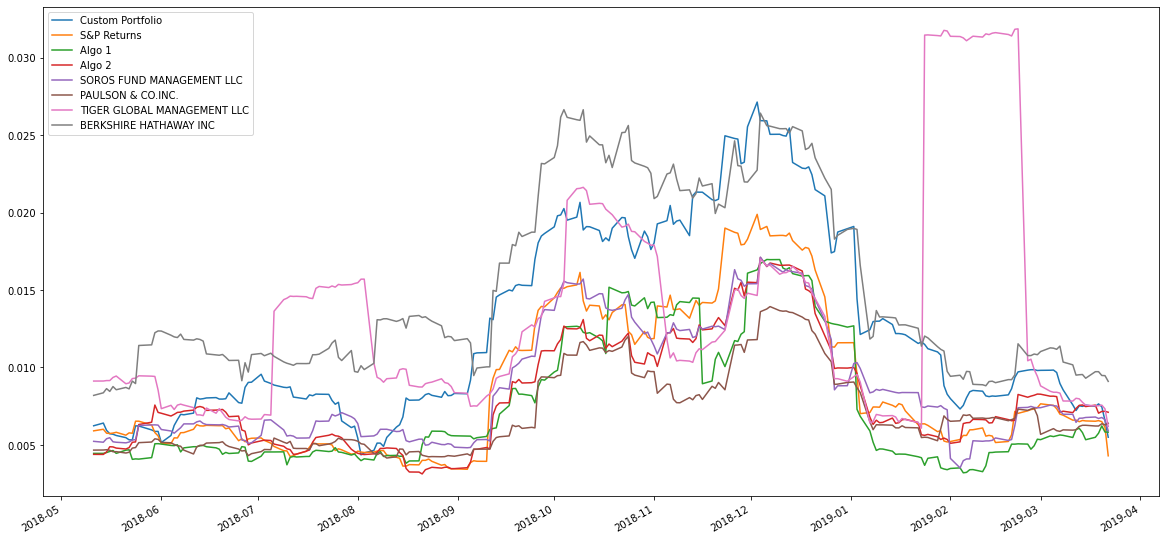

In [38]:
# Calculate rolling standard deviation
My_std = My_combined_df.rolling(window=21).std().dropna()
My_std
# Plot rolling standard deviation
My_std.plot(figsize = (20,10))

### Calculate and plot the correlation

In [39]:
# Calculate and plot the correlation
My_corr = My_combined_df.corr()
My_corr

,Custom Portfolio,S&P Returns,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Custom Portfolio,1.000000,0.869976,0.073296,0.039910,0.061503,0.025680,0.036047,0.006755
S&P Returns,0.869976,1.000000,-0.054454,-0.042549,-0.028091,-0.059893,0.005812,-0.038751
Algo 1,0.073296,-0.054454,1.000000,0.364440,0.336890,0.360668,0.113568,0.326025
Algo 2,0.039910,-0.042549,0.364440,1.000000,0.861989,0.783856,0.408381,0.781894
SOROS FUND MANAGEMENT LLC,0.061503,-0.028091,0.336890,0.861989,1.000000,0.791031,0.476938,0.816190
PAULSON & CO.INC.,0.025680,-0.059893,0.360668,0.783856,0.791031,1.000000,0.484917,0.650132
TIGER GLOBAL MANAGEMENT LLC,0.036047,0.005812,0.113568,0.408381,0.476938,0.484917,1.000000,0.323931
BERKSHIRE HATHAWAY INC,0.006755,-0.038751,0.326025,0.781894,0.816190,0.650132,0.323931,1.000000


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'60-Day Rolling Beta: Custom Portfolio'}>

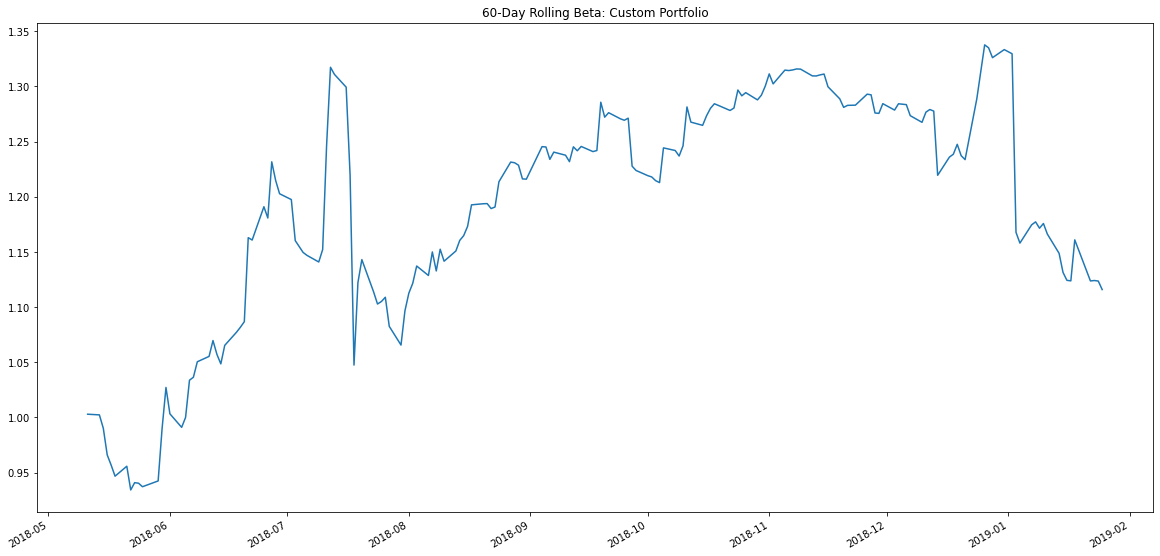

In [40]:
# Calculate and plot Beta
My_rolling_covariance = My_combined_df['Custom Portfolio'].rolling(window=60).cov(My_combined_df['S&P Returns'])
My_rolling_variance = My_combined_df['S&P Returns'].rolling(window=60).var()
My_rolling_beta = My_rolling_covariance/My_rolling_variance
My_rolling_beta.plot(figsize = (20,10), title = "60-Day Rolling Beta: Custom Portfolio")

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [41]:
# Calculate Annualzied Sharpe Ratios
My_returns = (1 + My_combined_df).cumprod()-1
My_returns.head()

,Custom Portfolio,S&P Returns,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
2019-04-22,-0.011812,-0.008764,0.000677,-0.001936,-0.002586,-0.007333,-0.003640,-0.001088
2019-04-18,-0.012946,-0.009766,0.000088,-0.003163,-0.001142,-0.006120,-0.003061,0.000826
2019-04-17,-0.014467,-0.011327,-0.010214,-0.008374,-0.004035,-0.012547,-0.007457,0.004051
2019-04-16,-0.023484,-0.009074,-0.017087,-0.005499,-0.001346,-0.012164,-0.008282,0.004891
2019-04-15,-0.023802,-0.009578,-0.021345,-0.010046,-0.002767,-0.013306,-0.007887,-0.005653


<AxesSubplot:>

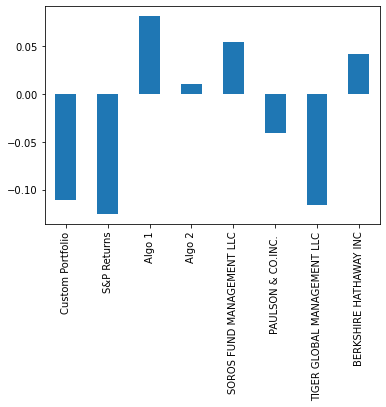

In [42]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios = ((My_returns.mean()-0.0159) / (My_returns.std() * np.sqrt(252)))
sharpe_ratios.plot(kind='bar')

### How does your portfolio do?

Write your answer here!

In [43]:
My Protfolio performed slightly better than the S&P but still lagged behind the other profolios

SyntaxError: invalid syntax (<ipython-input-43-caf8245b11dd>, line 1)